https://stepik.org/lesson/1576213/step/11

Если прямая описывается уравнением $y = ax + b$, то

$w_1=-a$

$w_2=1$

$w_0=-b$

Леая прямая: $y = 9/5 * x + 12/5$ => $w_1 = -9/5, w_2 = 1, w_0 = -12/5$

Правая прямая: $y = 3/4 * x + 9/2$ => $w_1 = -3/4, w_2 = 1, w_0 = -9/2$


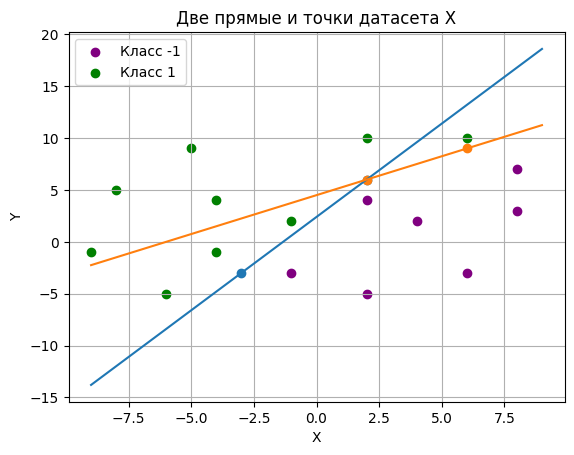

In [ ]:
import torch

# тензор X в программе не менять
batch_size = 32 # количество входных данных
# X = torch.tensor(list(map(float, input().split())), dtype=torch.float32).view(batch_size, 2)
# Для теста
X = torch.FloatTensor([
    [-9, -1], [-8, 5], [-6, -5], [-5, 9], [-4, 4], [-4, -1], [-1, 2], [2, 10],
    [-1, -3], [6, 10], [2, -5], [2, 4], [4, 2], [6, -3],  [8, 7], [8, 3]])

w11, w12, w21, w22 = -9/5, 1, -3/4, 1
w10, w20 = -12/5, -9/2

w1, w2 = 1, 1   # равный вклад
w0 = 0.5        # смещение

W1 = torch.tensor([(w11, w12), (w21, w22)], dtype=torch.float32)
bias1 = torch.tensor([w10, w20], dtype=torch.float32)
W2 = torch.tensor([w1, w2], dtype=torch.float32)
bias2 = torch.tensor([w0], dtype=torch.float32)

act = lambda x: torch.where(x > 0.0, torch.ones_like(x), -torch.ones_like(x))

z = act(X @ W1.t() + bias1)
predict = act(z @ W2 + bias2)

'''График'''
import matplotlib.pyplot as plt

X_plot = torch.FloatTensor([
    [-9, -1], [-8, 5], [-6, -5], [-5, 9], [-4, 4], [-4, -1], [-1, 2], [2, 10],
    [-1, -3], [6, 10], [2, -5], [2, 4], [4, 2], [6, -3],  [8, 7], [8, 3]])
z_plot = act(X_plot @ W1.t() + bias1)
pred = act(z_plot @ W2 + bias2)

# Точки на прямых
x1 = torch.tensor([[-3.0, -3.0], [2.0, 6.0]]) # Точки на нижней прямой
x2 = torch.tensor([[2.0, 6.0], [6.0, 9.0]])   # Точки на верхней прямой
plt.scatter(x1[:, 0], x1[:, 1])
plt.scatter(x2[:, 0], x2[:, 1])

# Прямые
x1_plot = torch.linspace(-9, 9, 10)
y1_plot = - x1_plot * W1[0, 0] / W1[0, 1] - bias1[0] / W1[0, 1]
plt.plot(x1_plot, y1_plot)
x2_plot = torch.linspace(-9, 9, 10)
y2_plot = - x2_plot * W1[1, 0] / W1[1, 1] - bias1[1] / W1[1, 1]
plt.plot(x2_plot, y2_plot)

# Точки датасета X с предсказанным цветом
plt.scatter(X_plot[predict == -1, 0], X_plot[pred == -1, 1], color='purple', label='Класс -1')
plt.scatter(X_plot[predict == 1, 0], X_plot[pred == 1, 1], color='green', label='Класс 1')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Две прямые и точки датасета X')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import torch
import torch.nn as nn

layer_nn = nn.RNN(3, 10, batch_first=True, bidirectional=True)
x = torch.rand(8, 7, 3)
a, b = layer_nn(x)
a.shape, b.shape

(torch.Size([8, 7, 20]), torch.Size([2, 8, 10]))